# <span style="color:blue"> <center>Case Geofusion</center></span>
## <center>Tratamento da base de dados</center>
<center>Solução proposta por Lucas Victor Silva Pereira</center>

#### Neste Jupyter Notebook é realizado o tratamento dos dados da base <font style="font-family: monaco">DadosDeliciousFood.csv</font>. A Base é de uma empresa fictícia do ramo alimentício que pretende expandir sua área de atuação da cidade do Rio de Janeiro para a cidade São Paulo. As informações que ela traz são:<br><br>$\ \ \ \ \ \ $ 1. código: identificação única de cada bairro de uma cidade;<br> $\ \ \ \ \ \ $ 2. nome: nome do bairro;<br> $\ \ \ \ \ \ $ 3. cidade: cidade que o bairro está situado;<br> $\ \ \ \ \ \ $ 4. estado: estado ao qual a cidade pertence;<br> $\ \ \ \ \ \ $ 5. população: população total de cada bairro;<br> $\ \ \ \ \ \ $ 6. popAte9: número de pessoas com até 9 anos;<br> $\ \ \ \ \ \ $ 7. popDe10a14: número de pessoas com 10 a 14 anos;<br> $\ \ \ \ \ \ $ 8. popDe15a19: número de pessoas com 15 a 19 anos;<br> $\ \ \ \ \ \ $ 9. popDe20a24: número de pessoas com 20 a 24 anos;<br> $\ \ \ \ \ \ $ 10. popDe25a34: número de pessoas com 25 a 34 anos;<br> $\ \ \ \ \ \ $ 11. popDe35a49: número de pessoas com 35 a 49 anos;<br> $\ \ \ \ \ \ $ 12. popDe50a59: número de pessoas com 50 a 59 anos;<br> $\ \ \ \ \ \ $ 13. popMaisDe60: número de pessoas com 60 anos ou mais;<br> $\ \ \ \ \ \ $ 14. domiciliosA1: quantidade de domicílios de renda A1;<br> $\ \ \ \ \ \ $ 15. domiciliosA2: quantidade de domicílios de renda A2;<br> $\ \ \ \ \ \ $ 16. domiciliosB1: quantidade de domicílios de renda B1;<br> $\ \ \ \ \ \ $ 17. domiciliosB2: quantidade de domicílios de renda B2;<br> $\ \ \ \ \ \ $ 18. domiciliosC1: quantidade de domicílios de renda C1;<br> $\ \ \ \ \ \ $ 19. domiciliosC2: quantidade de domicílios de renda C2;<br> $\ \ \ \ \ \ $ 20. domiciliosD: quantidade de domicílios de renda D;<br> $\ \ \ \ \ \ $ 21. domiciliosE: quantidade de domicílios de renda E;<br> $\ \ \ \ \ \ $ 22. rendaMedia: renda Média por Domicílio;<br> $\ \ \ \ \ \ $ 23. faturamento: faturamento total no bairro;<br> $\ \ \ \ \ \ $ 34. potencial: potencial do bairro.

Como boa prática de programação, independente de onde as funções são utilizadas, todas bibliotecas são inicializadas no começo do código.

In [14]:
#Required Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Os dados da base <font style="font-family: monaco">DadosDeliciousFood.csv</font> passam pelo seguinte tratamento:<br>
$\ \ \ \ \ \ $ 1. Importação dos dados do arquivo em formato *csv* para um *data frame*;<br>
$\ \ \ \ \ \ $ 2. Remoção das linhas duplicadas;<br>
$\ \ \ \ \ \ $ 3. Checagem se após a remoção das linhas duplicadas, há linhas com a *Primary key* (coluna *codigo*) duplicada;<br>
$\ \ \ \ \ \ $ 4. Substituição das células com os caracteres <font style="font-family: monaco">'-'</font> e <font style="font-family: monaco">'?'</font> para valores <font style="font-family: monaco">NaN</font>;<br>
$\ \ \ \ \ \ $ 5. Remoção das linhas onde a divisão da população em idade não é feita;<br>
$\ \ \ \ \ \ $ 6. Remoção das linhas onde a classificação dos domicílios por renda não é feita;<br>
$\ \ \ \ \ \ $ 7. Remoção das linhas sem informação da renda média e faturamento.<br>


In [2]:
#Read and process the database
url = 'dataset/DadosDeliciousFood.csv'

dfFoodB = pd.read_csv(url, encoding='utf-8')
dfFoodB = dfFoodB.drop_duplicates()
if (dfFoodB.duplicated('codigo').sum() > 0):
    print("ALERT: DATA CONFLICT. Check possible solutions with data engineers.")
dfFoodB = dfFoodB.replace('-', np.nan)
dfFoodB = dfFoodB.replace('?', np.nan)

mask = ((dfFoodB['popAte9'] == 0) & (dfFoodB['popDe10a14'] == 0) & (dfFoodB['popDe15a19'] == 0) & (dfFoodB['popDe20a24'] == 0) & (dfFoodB['popDe25a34'] == 0) & (dfFoodB['popDe35a49'] == 0) & (dfFoodB['popDe50a59'] == 0) & (dfFoodB['popMaisDe60'] == 0)) |\
       ((dfFoodB['domiciliosA1'] == 0) & (dfFoodB['domiciliosA2'] == 0) & (dfFoodB['domiciliosB1'] == 0) & (dfFoodB['domiciliosB2'] == 0) & (dfFoodB['domiciliosC1'] == 0) & (dfFoodB['domiciliosC2'] == 0) & (dfFoodB['domiciliosD'] == 0) & (dfFoodB['domiciliosE'] == 0)) |\
       (dfFoodB['população'] != (dfFoodB['popAte9'] + dfFoodB['popDe10a14'] + dfFoodB['popDe15a19'] + dfFoodB['popDe20a24'] + dfFoodB['popDe25a34'] + dfFoodB['popDe35a49'] + dfFoodB['popDe50a59'] + dfFoodB['popMaisDe60'])) |\
       ((dfFoodB['rendaMedia'] == 0) & (dfFoodB['faturamento'] == 0))
dfFoodB = dfFoodB.loc[~mask]

Note que a base pode ser dividida em duas:<br>
$\ \ \ \ \ \ $ 1ª parte: bairros da cidade de Rio de Janeiro (<font style="font-family: monaco">dfFoodBRJ</font>), onde há detalhes de *faturamento* e *potencial*;<br>
$\ \ \ \ \ \ $ 2ª parte: bairros da cidade de São Paulo  (<font style="font-family: monaco">dfFoodBSP</font>), onde não há informações sobre o *faturamento* e *potencial*.<br>

Essa divisão será feita pois as informações extraídas dos bairros da cidade do Rio de Janeiro irão ajudar a predizer o faturamento dos bairros da cidade de São Paulo e consequentemente o potencial deles.<br>

Observe que há apenas 6 linhas com relação à cidade do RJ, que possuem **valores NaN** e delas quase todas (5 ou ≈83.33%) são de bairros com potencial baixo para a empresa. Portanto, ao invés de preenchê-las, seja com a *média, moda, mediana* ou até mesmo com algum tipo de *regressão*, a decisão foi removê-las.<br> Contudo, como já citado, uma maneira simples de preenchê-las seria tirando a média da coluna e então substituindo os **valores NaN**. Um código curto que realiza esta operação está apresentado abaixo:

```python
# converter para o formato Numpy e ignorar os dados nominais
Xaux = np.array(dfFoodBRJ[dfFoodBRJ.columns[4:-1]], dtype = float) 
# calcular a média de cada atributo e armazenar em um vetor
# utilizar a função nanmean que calcula a média ignorando os NaN
averages = np.nanmean(Xaux, axis = 0) 
for i in np.arange(0, Xaux.shape[0]):
    for j in np.arange(0, Xaux.shape[1]):
        if(np.isnan(Xaux[i,j]) == True): # verificar se é uma entrada com NaN
            dfFoodBRJ.iloc[i,(j+4)] = int(averages[j]) # inserir a média
#'''''
```

Entretanto, observe que não é o fato dos bairros possuírem *baixo potencial* para a empresa que levou a exclusão. Pensando nos algoritmos de aprendizado, eles precisam saber detectar quando um bairro é *ruim*, e aprendem a fazer isso vendo vários exemplos de bairros com baixo potencial. Portanto, o que levou a exclusão é o fato do número de bairros com baixo potencial ser maior do que bairros classificados com *médio* e *alto* potencial, ou seja, excluí-los não introduz incertezas na base de dados e contribui para tornar-lá mais balanceada entre as *três classes*.

Além disso, 5 variáveis podem ser desconsideradas, pois não agregam informações relavantes, são elas: *código*, *nome*, *estado*, *cidade* e *população*. Código e nome são apenas identificadores dos bairros. O estado e cidade não são relevantes pois na base de dados <font style="font-family: monaco">dfFoodBRJ</font> eles são únicos. E, por fim, a variável população pode ser totalmente explicada pela sua discretização: *popAte9*, *popDe10a14*, ..., *popMaisDe60*.

In [3]:
dfFoodBRJ = dfFoodB.loc[dfFoodB['estado'] == "RJ"]
if(not dfFoodBRJ[dfFoodBRJ.isna().any(axis=1)].empty):
    print("Num oh the Rows NaN in dataFrame \"dfFoodBRJ\":", dfFoodBRJ[dfFoodBRJ.isna().any(axis=1)].shape)
    print("\nRows NaN in dfFoodBRJ:\n", dfFoodBRJ[dfFoodBRJ.isna().any(axis=1)])

dfFoodBRJ = dfFoodBRJ.dropna(axis='rows') #remove rows NaN/null
dfFoodBRJ = dfFoodBRJ.drop(['codigo','nome','cidade','estado','população'], axis=1)

Num oh the Rows NaN in dataFrame "dfFoodBRJ": (6, 24)

Rows NaN in dfFoodBRJ:
          codigo                     nome          cidade estado  população  \
6    3304557082                     Anil  Rio de Janeiro     RJ      24855   
26   3304557005                  Catumbi  Rio de Janeiro     RJ      12910   
52   3304557086  Freguesia (Jacarepaguá)  Rio de Janeiro     RJ      72501   
71   3304557146                   Jacaré  Rio de Janeiro     RJ       9538   
89   3304557032                 Maracanã  Rio de Janeiro     RJ      25969   
122  3304557006             Rio Comprido  Rio de Janeiro     RJ      44998   

     popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  \
6       2427        1227        1777        1804        3730  ...   
26      1773         805        1018         999        1985  ...   
52      7991        3709        5257        5159       10923  ...   
71      1326         629         763         712        1547  ...   
89      1696         843     

Com os dados referentes aos bairros da cidade do RJ separados e tratados, a base de dados está pronta para ser analisada.<br>

Para iniciar, abaixo são apresentados alguns dados de estatística descritiva sobre cada uma das colunas numéricas da base de dados. 

In [4]:
dfFoodBRJ.describe() # Descriptive statistics data 

,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,faturamento
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,5403.279221,2518.837662,3311.116883,3386.681818,6650.331169,8901.909091,5374.831169,7530.448052,391.974026,596.623377,1856.525974,2395.954545,3586.155844,3072.181818,577.058442,1856.772727,8.701803e+05
std,11008.972231,5037.002622,5851.900968,5698.898125,9196.873495,11710.858917,8118.995209,10425.899252,1429.321101,1552.853995,3004.463147,2817.055628,4391.463785,4065.856812,837.320073,2327.010887,4.430037e+05
min,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,2.000000,2.465100e+04
25%,1512.250000,678.250000,945.000000,988.500000,2151.500000,2910.250000,1630.750000,2114.750000,0.000000,0.000000,393.000000,728.000000,1080.250000,774.750000,117.250000,430.500000,7.051840e+05
50%,3150.000000,1450.500000,2034.000000,2183.500000,4288.500000,5675.000000,3337.500000,4536.500000,0.000000,104.000000,833.500000,1497.000000,2458.000000,1883.500000,330.000000,1051.500000,8.220250e+05
75%,5650.750000,2648.500000,3450.250000,3435.750000,7143.500000,9596.250000,6333.750000,9282.000000,0.000000,351.750000,1909.000000,3079.250000,4261.000000,3627.250000,696.000000,2267.250000,9.325952e+05
max,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.000000,14833.000000,2.915612e+06


Note que existe uma grande discrepância na escala dos dados, principalmente quando a variável faturamento é comparada as outras. Poderia ser minimizado através da técnica de *normalização*. Dentre todas as variáveis numéricas, a única que pode conter dados negativos é o faturamento, portanto, a base de dados poderia ser normalizada da seguinte maneira: faturamento no intervalo entre [-1, 1] e todas as outras entre [0, 1]. Com o auxílio da função *MinMaxScaler* da biblioteca *sklearn* isso é feito de forma transparente (sem necessariamente que o programador conheça a matemática que gere a normalização). Contudo, como qualquer normalização a *MinMaxScaler* possui um certo grau de perda da informação. Como o objetivo, por enquanto, é apenas a visualização dos dados, foi feita apenas uma redução de escala nas variáveis, de forma que a média delas fique no intervalo de [0, 100]. Isso diminui o valor absoluto do desvio padrão e variância, facilitando a visualização.

In [5]:
dfFoodBRJ.iloc[:,:-1] = dfFoodBRJ.iloc[:,:-1].astype('float')
dfFoodBRJ.iloc[:,0:16] = dfFoodBRJ.iloc[:,0:16] / 100
dfFoodBRJ['faturamento'] = dfFoodBRJ['faturamento'] / 10000

Uma outra técnica que pode ser usada é a *padronização*.

Como dados naturais (que acontecem na natureza de forma normal) tendem a descrever uma distribuição *normal*, o histograma do somatório da população discretizado por idade (colunas de 0 a 8) descreve uma gaussiana.

Os valores da coluna *faturamento* apresentam uma distribuição normal com alguns *outlier* (imagem apresentada abaixo).

Já a variável *rendaMedia* é claramente assimétrica à direita. Associando-a a outras variáveis, como as *domiciliosX*, onde X = {A1, A2, B1, B2, C1, C2, D, E}, há um número maior de domicílios pertencentes as classes C1, C2, D e E, do que pertencentes as classes A1, A2, B1 e B2. Portanto, a variável *rendaMedia* será assimétrica à direita. Entretanto, ao aplicar a função logaritmo o pico do histograma é suavizado e é possível ver uma aproximação grosseira de uma curva gaussiana (imagem apresentada abaixo). Mais especificamente o gráfico da viriável rendaMedia, plotado a mais, se mostra muito proximo de uma Log-Normal.

A variável *potencial* é nominal, e portanto, não deve ser nem normalizada ou padronizada.

Assumindo que as variáveis possuem distribuição normal, é possível padronizar os dados. Desta forma, todas a variáveis terão média zero e desvio padrão igual a um. Essa padronização pode ser feita utilizando a função *StandardScaler* também da biblioteca *sklearn*.

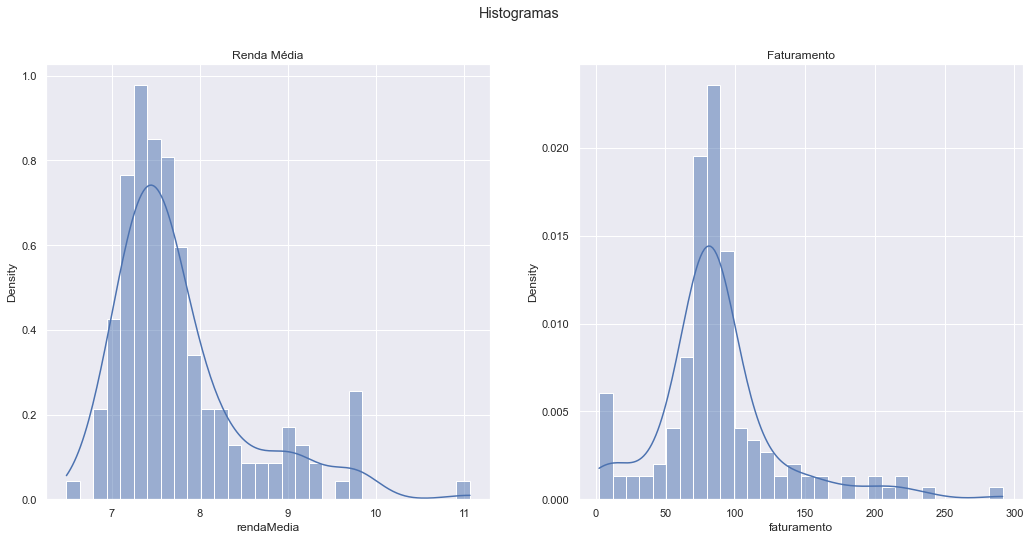

In [6]:
dfFoodBRJ['rendaMedia'] = np.log(dfFoodBRJ['rendaMedia'])

sns.set(rc={'figure.figsize':(17.5,8)})
fig,axes = plt.subplots(1,2)
fig.suptitle('Histogramas')
sns.histplot(dfFoodBRJ['rendaMedia'], bins=30, kde=True, stat="density", ax=axes[0])
axes[0].set_title("Renda Média")
plt.grid(True)

sns.histplot(dfFoodBRJ['faturamento'], bins=30, kde=True, stat="density", ax=axes[1])
axes[1].set_title("Faturamento")
plt.show()

A base <font style="font-family: monaco">dfFoodBRJ</font> fornece ao total 24 variáveis, das quais 19 estão sendo consideradas como variáveis independentes e dependentes. Entretanto, mesmo antes da realização dos cálculos de *correlação de Pearson*, é possível imaginar que todas as variáveis relacionadas a idade serão correlacionadas, e que as variáveis domicílios A1 e A2, B1 e B2 e C1 e C2 serão no mínimo correlacionadas. Por esse motivo, o campo abaixo cria a matriz de correção de Pearson (ou matriz de confusão das correlações de Pearson).

Como a variável *potencial* é *ordinal*, para dar o sentido de que $Alto > Médio > Baixo$, a coluna *potencial* passa pela seguinte transformação:<br>
$\ \ \ \ \ \ \ \ \ \ \ \ $ Baixo = 0;<br>
$\ \ \ \ \ \ \ \ \ \ \ \ $ Médio = 1;<br>
$\ \ \ \ \ \ \ \ \ \ \ \ $ Alto $\ \ $ = 2.

In [7]:
#Turns the potential class that is nominal into numbers 
classes = np.unique(dfFoodBRJ[dfFoodBRJ.columns[-1]]) # Stores the name of the classes 
#classes = classes[::-1].sort()
for i in classes:
    convert = False;
    if(i == 'Baixo'):
        number = 0
        convert = True;
    elif(i == 'Médio'):
        number = 1
        convert = True;
    elif(i == 'Alto'):
        number = 2
        convert = True;
    if(convert):
        dfFoodBRJ['potencial'] = dfFoodBRJ['potencial'].replace(i, number) # substitui cada valor da classe por number
    #number = number - 1
#'''

A função implementada abaixo (*plotCorrGraph*), cria uma *grafo* que representa a correlação de *pearson* entre as variaveis de um *dataFrame*

In [17]:
#import networkx as nx

def plotCorrGraph(df, limit = 0.0, altura1 = 7, largura1 = 8):
    # Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
    corr = df.corr().abs()
  
    # Transform it in a links data frame (3 columns only):
    links = corr.stack().reset_index()
    links.columns = ['var1', 'var2','value']
  
    # Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
    links_filtered = links.loc[(links['var1'] != links['var2'])]

    links_filtered_Mask = (links_filtered['value'] < limit)
    links_filtered = links_filtered.loc[~links_filtered_Mask]

    temp = []
    checkvalues= []
    for row in links_filtered.values:
        if row[2] not in checkvalues:
            temp.append(row)
            checkvalues.append(row[2])
    
    links_filtered = pd.DataFrame(temp, columns=['var1', 'var2','value'])

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', )
  
    # Plot the network:
    nx.draw(G, with_labels=True, font_size=10, alpha=.75, node_color='#A0CBE2',edge_color=links_filtered.value.values, width=4, edge_cmap=plt.cm.Blues)
    
    plt.figure(figsize=(largura1, altura1))
    plt.show()

<ipython-input-37-17ca0b0e6077>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
g:\github\datascientist\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\github\datascientist\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9733 missing from current font.
  font.set_text(s, 0, flags=flags)


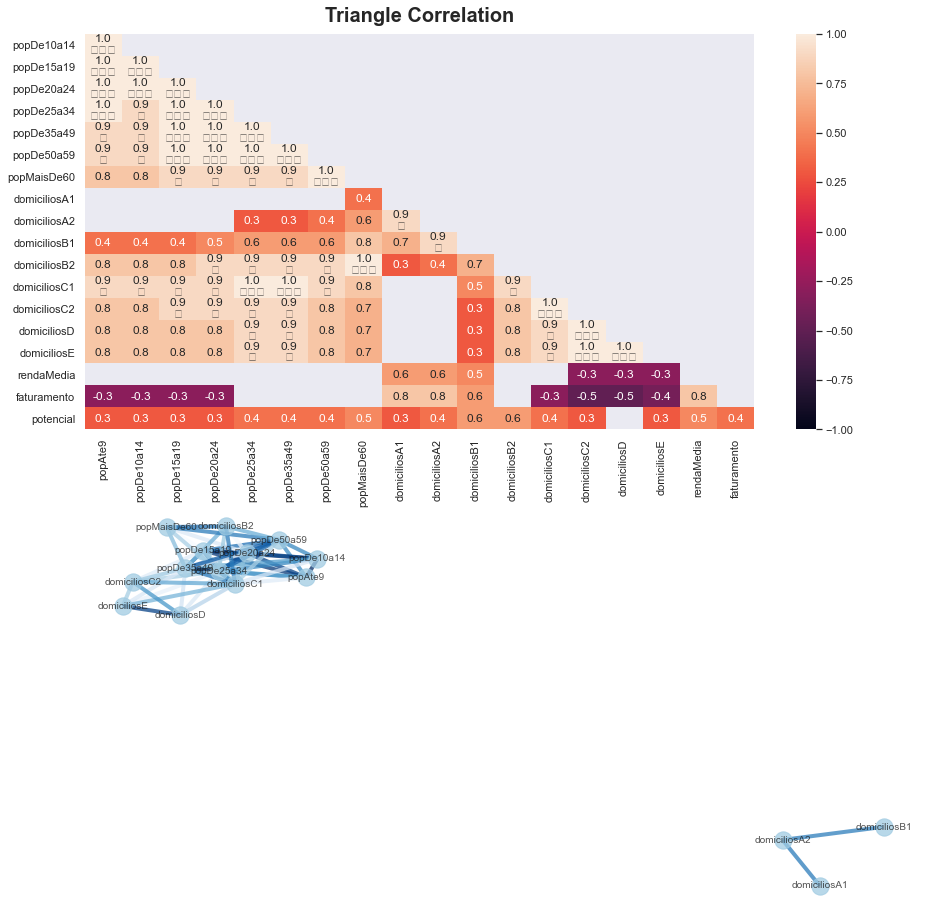

<Figure size 576x504 with 0 Axes>

In [37]:
#sns.set(rc={'figure.figsize':(12,7)})
plt.figure(figsize=(15, 16))
plt.subplot(2,1, 1)

#sns.heatmap(data=dfFoodBRJ.corr(method="pearson"), annot = True) # annot = True to print the values inside the square

corr = round(dfFoodBRJ.corr(method="pearson"), 1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.21  # only show cells with abs(correlation) at least this value
#extreme_1 = 0.9  # show with a star
#extreme_2 = 0.98  # show with a second star
#extreme_3 = 0.99  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

#mask |= np.abs(corr) >= 0.9999
#corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

#annot = [[f"{val:.1f}"
#          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
#          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
#          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
#          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='')
heatmap.set_title("Triangle Correlation", fontdict={'fontsize': 18}, fontsize = 20, fontweight = 'bold', pad=12)

plt.subplot(2,1, 2)
#plt.title('Graph Correlation', fontdict={'fontsize': 18}, fontsize = 20, fontweight = 'bold', pad = 12)
plotCorrGraph(dfFoodBRJ, 0.85)
plt.show()

Pensando em método de regressão que tente prever o faturamento da empresa baseado nos dados de um bairro, pode-se retirar da matriz de correlação de Pearson, baseado na penúltima linha (de faturamento), que variáveis como domiciliosA1, A2, B1 e rendaMedia possuem alta correlação positiva, isto é, à medida que valores dessas variáveis aumentam, o faturamento tende a aumentar. Já variáveis como domiciliosC1, C2, D e E possuem correlações negativas, ou seja, o aumento do valor dessas variáveis tende a implicar na diminuição do faturamento.

Contudo, note também que há uma forte correlação positiva entre as variáveis domiciliosA1, A2, B1 e uma correlação negativa entre as variáveis domiciliosC1, C2, D e E. Isso é um forte indicativo de não há necessidade de utilizar todas elas em um regressor para explicar a variância da variável faturamento.

Por isso, será aplicado à técnica de **Análise de Componentes Principais** ou **PCA (Principal Component Analysis)**.

Observe que os gráficos de dispersão abaixo, onde são plotadas as variáveis mais correlacionadas com o *faturamento*, corroboram a explicação apresentada acima.

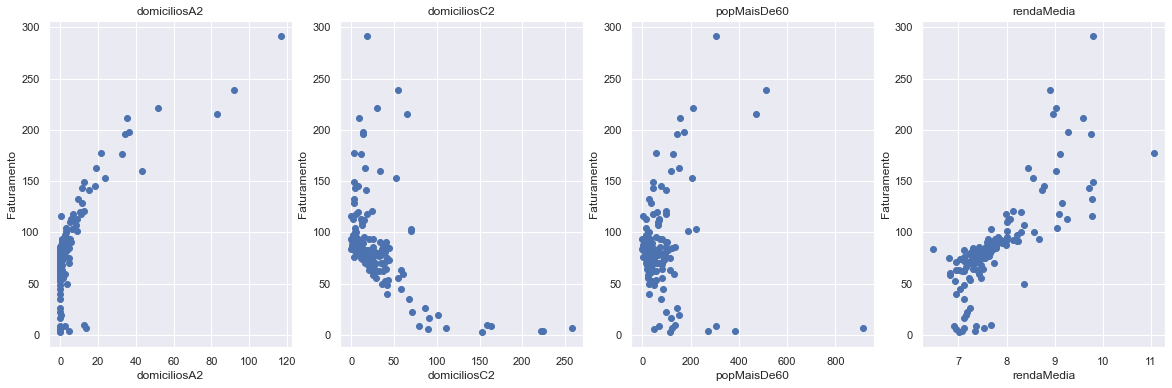

In [25]:
#sns.pairplot(dfFoodBRJ[['domiciliosA2','domiciliosC2','popMaisDe60','rendaMedia', 'faturamento']])
#plt.show()

plt.figure(figsize=(20, 6))
features = ['domiciliosA2','domiciliosC2','popMaisDe60','rendaMedia']
target = dfFoodBRJ['faturamento']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = dfFoodBRJ[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Faturamento')

O principal intuito da análise dos gráficos de *boxplot* é verificar **outliers**, entretanto, ele traz diversas informações úteis, como por exemplo, o valor da média. Nesta análise ele foi utilizado com dois propósitos maiores.

### <center>Outliers</center>

No momento da coleta é comum que dados ruidosos ou incorretos sejam introduzidos, seja pela incerteza dos equipamentos de medida, informações fornecidas pelo entrevistado, ou por outras formas.

Todavia, é importante frisar que **outliers** nem sempre são dados incorretos, mas o fenômeno que explica a sua ocorrência pode não estar contida na base de dados. Por exemplo, se a empresa em estudo estiver ligada estritamente à venda de produtos que contenha carne suína ou frutos do mar, em um bairro predominantemente de moradores que seguem a religião judaica e com a maioria dos domicílios das classes A1, A2, B1 e B2, não irá gerar um faturamento alto para a empresa e por consequência ela não o verá como de potencial alto para investimento. Por ter domicílios de classes de renda alta este bairro deveria ser classificado como tendo alto potencial. Contudo, devido ao fato de maioria dos moradores serem judeus ele tem um baixo potencial. Se a religião não for levada em consideração na base de dados este exemplo será um **outlier**.

Uma maneira de detectar **outliers** é através dos *boxplots*. Resumidamente, a **Variação interquartil (Interquartile Range - IQR)** é uma medida de dispersão baseada na mediana, portanto, como ela não dependa da média, é uma medida robusta a **outliers**. O **IQR** pode ser calculado através dos valores dos *quartis* (obtidos a partir da função *describe* da biblioteca *pandas*), isto é, $IQR~=~Q_{3}~-~Q_{1}$. Graficamente, quaisquer dados abaixo ($Q_{1} - 1.5*IQR$) ou acima ($Q_{3} + 1.5*IQR$) das barras de limitação dos bloxplots são *matematicamente* valores **outliers** (veja a imagem abaixo).

<img src="https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png" style="height:300px"> 
Fonte da Imegem: https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png

Como o faturamento é retirado de um software da empresa, e o estudo é de suma importância, a equipe de engenheiros de dados deve ter tomado bastante cuidado para recuperá-los. Os demais dados provavelmente são de estatísticas do IBGE, portanto, há poucas chances de falhas, por isso, o método acima não será aplicado na base de dados. Todavia, há alguns valores muito discrepantes que foram retirados. Veja na figura abaixo que nos bloxplots *Renda Média* e *População Com Mais de 60 Anos*, há em cada um deles uma amostra que se destoa muito, portanto, ela foi retirada.

O código abaixo executa a remoção dos **outliers** a partir do cálculo do **IQR**:

```python
Q1 = dfFoodBRJ.quantile(0.25) # 1st quartile calculation 
Q3 = dfFoodBRJ.quantile(0.75) # 3st quartile calculation 
IQR = Q3 - Q1 # IQR calculation  
mask_0 = (((dfFoodBRJ < (Q1 - 1.5 * IQR)) | (dfFoodBRJ > (Q3 + 1.5 * IQR))).any(axis=1)) # mask with outliers 
dfFoodBRJ = dfFoodBRJ.loc[~mask] # removal of outliers 
```

### <center>Interseção das Classes</center>

Outra informação que pode ser retirada dos *boxplots* apresentados abaixo são que algoritmos de clusterização terão maior facilidade de agrupar as amostras por baixo, médio e de alto potencial, levando em consideração, por exemplo, uma das variáveis: *popMaisDe60*, *rendaMedia* e *faturamento* ao invés da variável *domiciliosA2*. Isto porque há uma menor interseção entre as caixas das três classes quando a variável usada como métrica de distância é o faturamento.

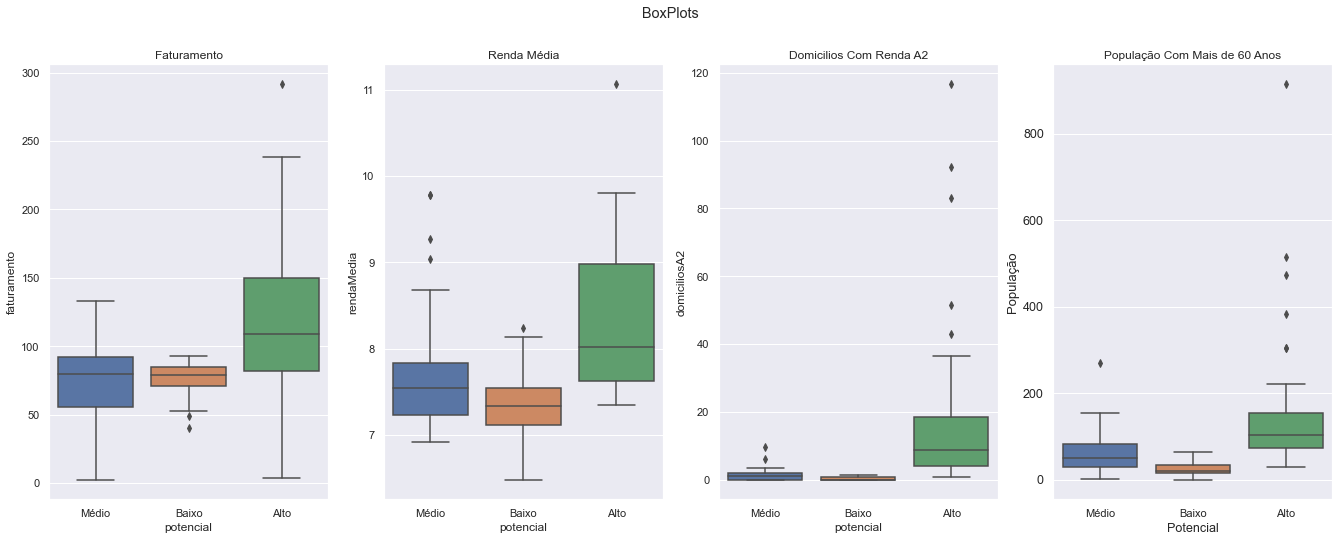

In [26]:
#Turns the potential class that is nominal into numbers 
classes = np.unique(dfFoodBRJ[dfFoodBRJ.columns[-1]]) # Stores the name of the classes 
for i in classes:
    convert = False;
    if(i == 0):
        number = 'Baixo'
        convert = True;
    elif(i == 1):
        number = 'Médio'
        convert = True;
    elif(i == 2):
        number = 'Alto'
        convert = True;
    if(convert):
        dfFoodBRJ['potencial'] = dfFoodBRJ['potencial'].replace(i, number) # substitui cada valor da classe por number

fig, axes = plt.subplots(1, 4, figsize=(23, 8))
fig.suptitle('BoxPlots')
sns.boxplot(ax=axes[0], x=dfFoodBRJ['potencial'], y=dfFoodBRJ['faturamento'])
axes[0].set_title("Faturamento")
plt.xlabel('Potencial', fontsize=12.5)
plt.ylabel('Faturamento', fontsize=13)
#plt.xticks(numbers, cl, fontsize=12.5) #shows class names instead of numbers 
plt.yticks(fontsize=12.5)
plt.grid(True)

sns.boxplot(ax=axes[1], x=dfFoodBRJ['potencial'], y=dfFoodBRJ['rendaMedia'])
axes[1].set_title("Renda Média")
plt.xlabel('Potencial', fontsize=12.5)
plt.ylabel('Renda Média', fontsize=13)
#plt.xticks(numbers, cl, fontsize=12.5) #shows class names instead of numbers 
plt.yticks(fontsize=12.5)
plt.grid()

sns.boxplot(ax=axes[2], x=dfFoodBRJ['potencial'], y=dfFoodBRJ['domiciliosA2'])
axes[2].set_title("Domicilios Com Renda A2")
plt.xlabel('Potencial', fontsize=12.5)
plt.ylabel('Domicilios A2', fontsize=13)
#plt.xticks(numbers, cl, fontsize=12.5) #shows class names instead of numbers #plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.grid()

sns.boxplot(ax=axes[3], x=dfFoodBRJ['potencial'], y=dfFoodBRJ['popMaisDe60'])
axes[3].set_title("População Com Mais de 60 Anos")
plt.xlabel('Potencial', fontsize=12.5)
plt.ylabel('População', fontsize=13)
#plt.xticks(numbers, cl, fontsize=12.5) #shows class names instead of numbers 
plt.show(True)

In [27]:
mask = (dfFoodBRJ['rendaMedia'] >= 11)
dfFoodBRJ = dfFoodBRJ.loc[~mask]

Visando o desenvolvimento do classificador é necessário verificar se as classes estão balanceadas. Percentualmente há 37% de bairros com potencial baixo, 31.8% médio e 31.2% alto. As duas classes mais importantes para a empresa estão balanceadas entre si e a terceira classe não possui em números absolutos uma quantidade amostral muito elevada. Dado essas informações há três caminhos a serem seguidos:<br>
1. Ignorar o desbalanceamento da base <font style="font-family: monaco">dfFoodBRJ</font> e treinar um classificador utilizando a base inteira como conjunto de treino e teste;
2. Balancear a base de forma que cada uma das classes contenha $N$ elementos. Isso pode ser feito, por exemplo, escolhendo de forma aleatória $N$ elementos, com ou sem reposição, de cada classe;
3. Aplicar perturbações em elementos das classes faltantes gerando um novo elemento. Essas perturbações devem ser controladas, por exemplo, pelo valor do desvio padrão. Contudo, note que essas perturbações podem fazer com que o novo elemento criado mude de classe. Devido a isso, essa é uma estratégia que envolve um risco maior, sendo aconselhável quando a equipe de tratamento dos dados possui um conhecimento *a priori* sobre o tema estudo.

Nos classificadores desenvolvidos neste <font style="font-family: monaco">case</font>, o tratamento será feito utilizando a estratégia apresentado em 2, *sem reposição* dos elementos.

Número de amostras de cada classe:
   Baixo = 57
   Médio = 49
   Alto  = 47
Porcentagem amostral de cada classe:
   Baixo = 37.25%
   Médio = 32.03%
   Alto  = 30.72%


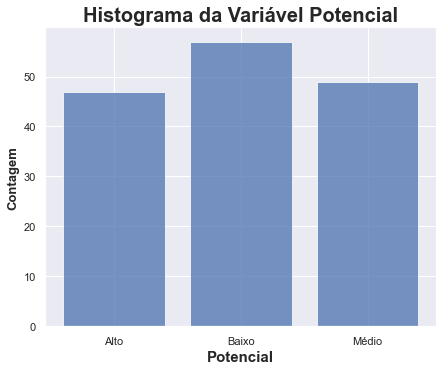

In [28]:
classes = dfFoodBRJ[dfFoodBRJ.columns[-1]]
cl = np.unique(classes)

ncl = np.zeros(len(cl)) #stores the number of elements in each class 
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])

print(f'Número de amostras de cada classe:\n   Baixo = {int(ncl[1])}\n   Médio = {int(ncl[2])}\n   Alto  = {int(ncl[0])}')
print(f'Porcentagem amostral de cada classe:\n   Baixo = {round((100 * ncl[1] / ncl.sum()), 2)}%\n' \
      f'   Médio = {round((100 * ncl[2] / ncl.sum()), 2)}%\n   Alto  = {round((100 * ncl[0] / ncl.sum()), 2)}%')

numbers = np.arange(0, len(cl)) #number of classes 
sns.set(rc={'figure.figsize':(7,5.5)})
plt.bar(numbers, ncl, align='center', alpha=.75)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title("Histograma da Variável Potencial", fontsize=20, fontweight='bold')
plt.xlabel('Potencial', fontsize=15, fontweight='bold')
plt.ylabel('Contagem', fontsize=13, fontweight='bold')
plt.show(True)

Por fim, como já mencionado na análise da *matriz de correlação de Pearson*, há muita correlação entre as 19 variáveis independentes, isso é um indicativo de que é possível reduzir a dimensão do problema. Em outras palavras, é provável que seja possível prever o valor do faturamento ou qualquer outra variável dependente utilizando um número reduzido de variáveis explicativas.

#### Aparentemente isso pode ser uma incoerência, afinal, se os dados estão à disposição, o porquê de não usá-los? 

A explicação vem de um artigo apresentado em 1968 por *Hughes*, em que ele explica o fenômeno conhecido como *<font style="font-family: monaco">maldição da dimensionalidade</font>* (ou *<font style="font-family: monaco">fenômeno Hughes</font>*). Dados em alta dimensionalidade oferecem novas possibilidades no processo de aprendizagem (classificadores e regressores). Entretanto, ele insere novos desafios ao processo. Possivelmente, o maior desafio neste caso consiste na estimação de parâmetros associados aos algoritmos. O número de parâmetros a serem estimados, na matriz covariância particularmente, cresce rapidamente a medida em que a dimensionalidade dos dados aumenta. Se o número das amostras de treinamento não aumenta, a confiabilidade na estimação destes parâmetros decresce. Em outras palavras, quando o tamanho das amostras de treinamento permanece constante, o acréscimo de variáveis independentes resulta no aumento da variância, isto é, na incerteza da estimativa dos parâmetros.

Existem técnicas que estimam o número de parâmetros necessários para um número $n$ de variáveis independentes. Porém, de acordo com Hughes a relação entre dimensionalidade e o tamanho da base de dados tem razão exponencial. Observe que após o processo de tratamento dos dados, a base de dados <font style="font-family: monaco">dfFoodBRJ</font> possui 141 elementos. Portanto, utilizar as 19 variáveis explicativas pode até levar a uma melhor acurácia no treinamento, mas provavelmente não conseguirá generalizar o resultado obtido para a base de teste.

Na literatura há algumas técnicas que se propõem a diminuir a dimensionalidade fazendo extração das melhores *features* (características) para descrever a(s) variáveis dependentes. O que será aplicado na base de dados <font style="font-family: monaco">dfFoodBRJ</font> é o **PCA**.

De acordo com *Jain* em seu artigo <font style="font-family: monaco">Statistical pattern recognition: A review.</font> pulicado em 2010, o **PCA** é um *método linear não supervisionado* de *extração de características* que maximiza o espalhamento dos padrões no espaço de características, independente da classe em que esses pertencem. Em outras palavras ele seleciona as variáveis independentes que melhor explicam a variância causada na variável resposta.

Para fins de visualização, será aplicado o **PCA** de forma a extrair as duas variáveis que melhor explicam a variância dos dados. Dessa forma é possível plotar um gráfico onde os eixos são os principais componentes encontrados ($PC_{1}$ e $PC_{2}$) e ver como os dados se comportam.

In [29]:
scaler = StandardScaler().fit(dfFoodBRJ.drop(['faturamento','potencial'], axis=1))
dfFoodBRJPCAX = scaler.transform(dfFoodBRJ.drop(['faturamento','potencial'], axis=1))

pca = PCA(n_components=2)
pca.fit(dfFoodBRJPCAX)

pca_result = pca.fit_transform(dfFoodBRJPCAX)

varianciaPCA = pca.explained_variance_ratio_
print("Variância explicada por cada componente:", varianciaPCA)
print("Variância total Explicada pelas", len(varianciaPCA), "componentes:", varianciaPCA.sum())

Variância explicada por cada componente: [0.71130292 0.19439654]
Variância total Explicada pelas 2 componentes: 0.9056994576357467


Veja que os dados plotados abaixo corroboram a análise realizada com relação aos boxplots, clusterizar (agrupar) os dados por potencial não será uma tarefa fácil para os algoritmos, visto que não há uma separação bem definida entre as classes.

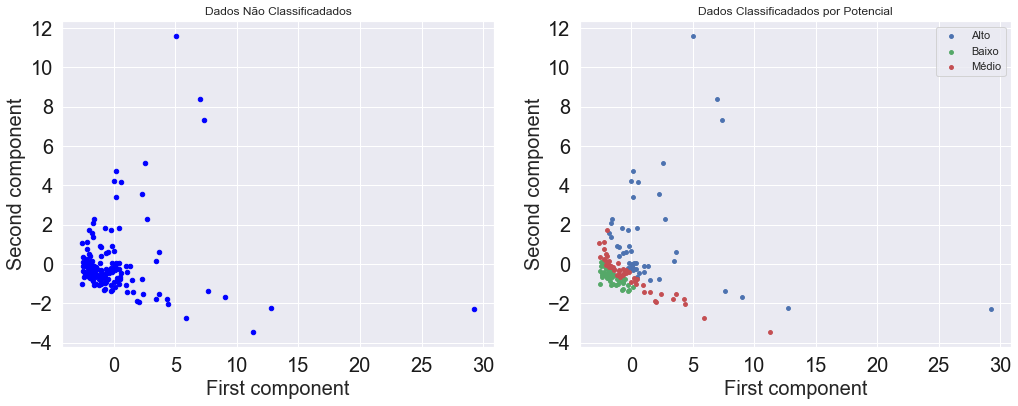

In [30]:
# define as cores possíveis
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(17,6))
plt.subplot(1,2, 1)

plt.scatter(pca_result[:,0], pca_result[:,1], s=20, color = 'blue')
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.title('Dados Não Classificadados')
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)

aux = 0
plt.subplot(1,2, 2)
for c in cl:
    nodes = np.where(dfFoodBRJ['potencial'] == c)
    # mostra os dados,considerando uma cor para cada classe
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=15, color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.title('Dados Classificadados por Potencial')
plt.show(True)

Pelo gráfico abaixo é possível ver que com as 11 primeiras componentes principais é explicado aproximadamente 100% da variância dos dados. Porém, devido ao problema da *<font style="font-family: monaco">maldição da dimensionalidade</font>* os algoritmos propostos não irão utilizar todas as 11 variáveis explicativas.

No modelo de *<font style="font-family: monaco">Regressão liniear</font>*, por exemplo, proposto em outro notebook (*script*), foi treinado com os dados dos bairros da cidade do Rio de Janeiro para predizer os valores de *faturamento* dos bairros da cidade de São Paulo. Nele é possível perceber que utilizar muitas *variáveis explicativas* aumenta o valor de $R^{2}$, mas diminui o valor de $R^{2}\_Ajustado$.

O cálculo de $R^{2}\_Ajustado$ é igual ao cálculo de $R^{2}$, mas é ponderado pela dimensão dos dados de entrada.

Variância Explicada pelos 2 primeiros componentes principais:  0.906
Variância Explicada pelos 4 primeiros componentes principais:  0.97
Variância Explicada pelos 10 primeiros componentes principais: 0.999
Variância Explicada pelos 11 primeiros componentes principais: 1.0
Variância Total explicada por todas as 17 componentes principais: 1.0


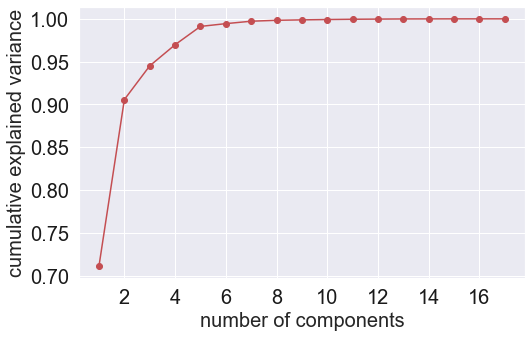

In [31]:
pca = PCA().fit(dfFoodBRJPCAX)
plt.figure(figsize=(8,5))

pca_result = pca.fit_transform(dfFoodBRJPCAX)

varianciaPCA = pca.explained_variance_ratio_
print("Variância Explicada pelos 2 primeiros componentes principais: ", round(varianciaPCA[:2].sum(), 3))
print("Variância Explicada pelos 4 primeiros componentes principais: ", round(varianciaPCA[:4].sum(), 3))
print("Variância Explicada pelos 10 primeiros componentes principais:", round(varianciaPCA[:10].sum(), 3))
print("Variância Explicada pelos 11 primeiros componentes principais:", round(varianciaPCA[:11].sum(), 3))
print("Variância Total explicada por todas as", len(varianciaPCA), "componentes principais:",\
      round(varianciaPCA.sum(), 3))

ncomp = np.arange(1, np.shape(dfFoodBRJPCAX)[1]+1)
# mostra a variância acumulada
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)